In [669]:
import numpy as np
import matplotlib.pyplot as plt

def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def tridiag_lower(a, c, k1=0, k3=-2):
    return np.diag(a, k1) + np.diag(c, k3)

def forward_diff(f, h):
    return (f[1:] - f[:-1]) / h

def central_diff(f, h):
    return (f[2:] - f[:-2]) / (2*h)

# Err = 0.26, 1.27
alpha = 0.0000001 # 0.002, 0.0002
N = 10 # 30, 90
h = 1 / N
delta = 0.001
a = 0
b = 4
xx = np.linspace(a, b, N)

solver = 'discrete'  # continuous, discrete
if solver == 'discrete':
    A_lower = tridiag_lower([1 + 5*alpha / (4*h**2)] + list(np.ones(N-4)*(1 + alpha/(2*h**2))) + [1 + 5*alpha / (4*h**2)],
                      [-alpha/(4*h**2)] + list(np.ones(N-6)*(-alpha/(4*h**2))) + [-alpha/(4*h**2)])
                
    A = A_lower + A_lower.T
    
    
    f_original = np.exp(xx)[1:-1]
    noise = np.random.choice([-1, 1], f_original.shape[0]) * delta
    f = f_original + noise
    f_0 = np.exp(a)
    f_n = np.exp(b)
    f[0] += alpha*f_0/(h**2)
    f[1] += alpha*f_0/(4*h**2)
    
    f[-2] += alpha*f_n/(4*h**2)
    f[-1] += alpha*f_n/(h**2)
    
    print(A[-5:, -5:], A.shape, f.shape)
    u = np.linalg.solve(A, f)
    u = np.r_[f_0, u, f_n]
elif solver == 'continuous':
    A = alpha / h**2 * \
    (tridiag(list(np.ones(N-2)) + [0],
             [h**2 / alpha] + list((-2 - h**2)*np.ones(N-2)) + [h**2 / alpha],
             [0] + list(np.ones(N-2))))
    
    f_original = np.exp(xx)
    f = f_original + np.random.choice([-1, 1], f_original.shape) * delta
    u = np.linalg.solve(A, f)
    
print(A.shape, f.shape)


[[ 2.000010e+00  0.000000e+00 -2.500000e-06  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  2.000010e+00  0.000000e+00 -2.500000e-06  0.000000e+00]
 [-2.500000e-06  0.000000e+00  2.000010e+00  0.000000e+00 -2.500000e-06]
 [ 0.000000e+00 -2.500000e-06  0.000000e+00  2.000010e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00 -2.500000e-06  0.000000e+00  2.000025e+00]] (8, 8) (8,)
(8, 8) (8,)


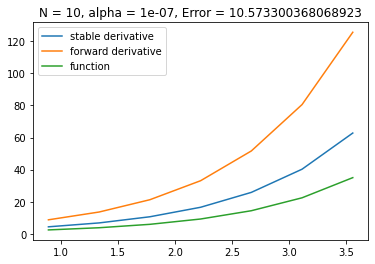

In [675]:
till = -1
xx_ = xx[2:till]
func_ = np.exp(xx)[2:till]
stable_d = forward_diff(u, h)[1:till]
plt.plot(xx_, stable_d, label='stable derivative')
plt.plot(xx_, forward_diff(f, h), label='forward derivative')
#plt.plot(xx_[:-1], central_diff(f, h), label='central derivative')
plt.plot(xx_, func_, label='function')
#plt.plot(xx, u, label='u')
plt.legend()
plt.title('N = ' + str(N) + ', alpha = ' + str(alpha) + ', Error = ' + str(np.mean(np.abs(func_ - stable_d))))
plt.savefig('ex3.png')

In [630]:
a = np.diag(np.ones(3), -2)
b = a + a.T

In [296]:
c = np.zeros(4)

In [298]:
c.append(2)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [424]:
np.r_[1, c, 2]

array([1., 0., 0., 0., 0., 2.])